In [2]:
#Basic setup
from ugot import ugot
got=ugot.UGOT()
got.initialize('192.168.1.29')
print("Connected")

192.168.1.29:50051
Connected


## UGOT Functions

In [ ]:
#Straight movement
got.mecanum_translate_speed_times(angle=0,speed=30,times=70,unit=1)

#Turning movement 2 left, 3 right
got.mecanum_turn_speed_times(turn=3,speed=45,times=180,unit=2)

#Load models
got.load_models(['apriltag_qrcode'])

#Release the object
got.mechanical_clamp_release()

#Close the clamp
got.mechanical_clamp_close()

#Get the apriltag info
got.get_apriltag_total_info()

#Play a tone
got.play_tone(tone="C5",beat=4,wait=True)

#Movement without duration
got.mecanum_translate_speed(angle=90,speed=20)

#Stop the robot
got.mecanum_stop()

## Camera

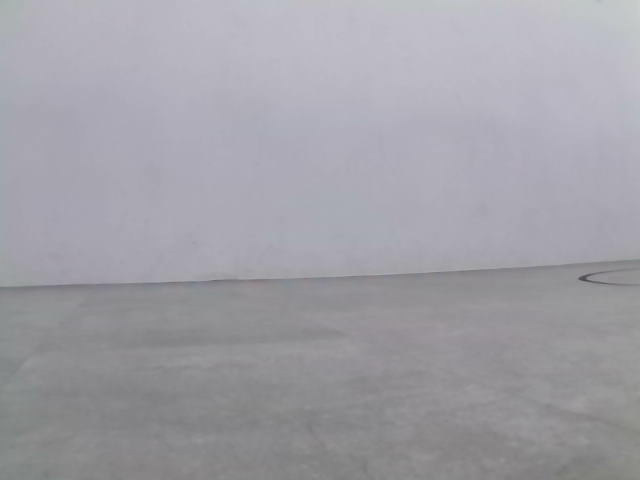

Done


In [5]:
# Camera
import numpy as np
import cv2
from IPython.display import display, clear_output
from PIL import Image

got.open_camera()
got.load_models(['apriltag_qrcode'])

try:
    while True:
        frame = got.read_camera_data()
        qr_code = got.get_apriltag_total_info()
        if frame is not None:
            if qr_code:
                if qr_code[0][0] == 1:
                    got.mecanum_move_speed(0, 30)
                elif qr_code[0][0] == 2:
                    got.mecanum_turn_speed(2, 45)
                elif qr_code[0][0] == 3:
                    got.mecanum_turn_speed(3, 45)
            else:
                got.mecanum_stop()
            
            nparr = np.frombuffer(frame, np.uint8)
            img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            img_pil = Image.fromarray(img_rgb)

            clear_output(wait=True)
            display(img_pil)
except KeyboardInterrupt:
    print("Done")
    got.mecanum_stop()

In [4]:
qr_code = ["1"]

if qr_code:
    print("True")
else:
    print("False")

True
